In [1]:
from scipy.integrate import ode

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [15]:
g, l, k, m = [10., 1.5, 30., .05]

X0 = 0
XF = 10
Y0 = [.5, 0., 0., 0.]

In [16]:
def f(t, Ys):
    th, dth, x, dx = Ys
    ddx = (l+x)*dth**2 - k/m*x + g*np.cos(th)
    ddth = (-g*np.sin(th) - 2*dx*dth)/(l+x)
    return np.array([dth, ddth, dx, ddx])

In [17]:
def solve(f, with_h = 1.):
    r = ode(f)
    r.set_initial_value(Y0, X0)

    dt = with_h
    Xs = []
    Ys = []
    
    max_iter = 1e6
    while r.successful() and r.t < XF and max_iter > 0:
        r.integrate(r.t + dt)
        Xs.append(r.t)
        Ys.append(r.y)
        max_iter -= 1
    return Xs, Ys

In [18]:
Xs, Ys = solve(f, with_h = 1e-4)

In [19]:
def plot_trajectory(Ys):
    ths = array(Ys)[:, 0]
    ls = array(Ys)[:, 3]
    Xs = (l+ls)*np.sin(ths)
    Ys = -(l+ls)*np.cos(ths)
    plot(Xs, Ys)
    plot(0., 0., 'ro')

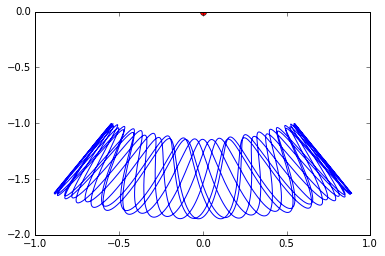

In [20]:
plot_trajectory(Ys)

In [24]:
from vapory import *
from IPython.display import Image
from IPython.display import *
import time
from moviepy.editor import VideoClip

(0, 1.6) (0.0, 1.0666666666666667)
0.533333333333 -0.0
0.0 2.13333333333
(0.0, 1.0666666666666667) (-0.0, 0.5333333333333333)
0.533333333333 0.0
0.0 1.6
(-0.0, 0.5333333333333333) (0, 0)
0.533333333333 -0.0
0.0 1.06666666667


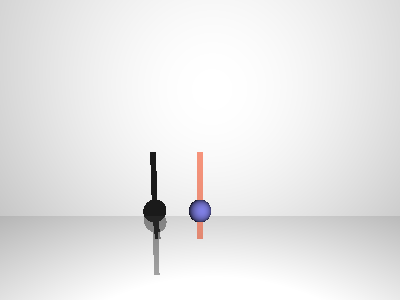

In [93]:
color = lambda col: Texture( Pigment( 'color', col))

def scene(th, x):  
    wall = Plane([0, 0, 1], 20, Texture(Pigment('color', [1, 1, 1])))
    ground = Plane( [0, -20, 0], 10,
                Texture( Pigment( 'color', [1, 1, 1]),
                         Finish( 'phong', 0.1,
                                 'reflection',0.4,
                                 'metallic', 0.3)))

    radius = .2
    sphere = Sphere([0,0,0],
                    radius,
                    color([.5, .5, .9]),
                    'translate', [0., x+l, 0.])
    length = x+l
    points = [(0,x+l), (.0, (x+l)/3*2), (-.0, (x+l)/3), (0, 0)]
    def line(fro, to, width=0.1):
        print(fro, to)
        xf, yf = fro
        xt, yt = to
        xd = xt - xf
        yd = yt - yf
        length = np.sqrt(xd**2 + yd**2)
        th = np.rad2deg(np.arctan(xd/yd))
        print(length, th)
        print((-xt + xf + length*np.sin(np.deg2rad(th))), (yf + length*np.cos(np.deg2rad(th))))
        return Union(
                    Box([-width/2, 0, 0], [width/2, length, 0],
                        color([1,.6,.5])),
                    'rotate', [0., 0., th],
                    'translate', [xf, yf])
                  
    spring = Union(*[line(p, np) for p, np in zip(points, points[1:])])
    #spring = line((0,0), (0, length))
    pendulum = Union(spring,
                     sphere,
                     'rotate', [0, 0, 180 + np.rad2deg(th)],
                     'translate', [0., 0.5, 0.])
    return Scene( Camera( 'location', [0, 1, -5], 'look_at',  [0, 0, 0] ),
            [ LightSource( [1, 1, -5], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              pendulum,
              wall,
              ground])
scene(0., 0.1).render('ipython', width=400, height=300)

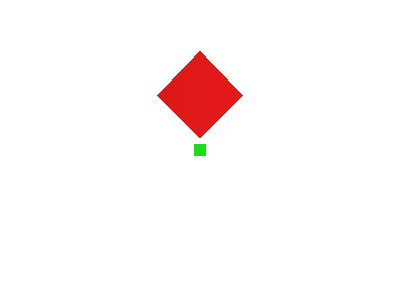

In [91]:
Scene( Camera( 'location', [0, 1, -5], 'look_at',  [0, 0, 0] ),
            [ LightSource( [1, 1, -5], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              Box([0,0,0], [1,1,1], color([.9, .1, .1]), 'rotate', [0, 0, 45], 'translate', [0, 0.2, 0]),
              Box([-.1,-.1,0], [0.1,0.1,0.], color([.1,.9,.1]))]).render('ipython', width=400, height=300)

In [44]:
def anim(Ys, d=10):
    ths = array(Ys)[:, 0]
    ls = array(Ys)[:, 3]
    ln = len(ls)
    scale = lambda t: int(t/d*ln)
    make_frame = lambda t: scene(ths[scale(t)], ls[scale(t)]).render(width = 400, height = 300, antialiasing=0.1)
    name = "anim_%d.gif" % time.time() 
    VideoClip(make_frame, duration=d).write_gif(name, fps=30)
    return Image(url = name)

In [206]:
anim(Ys, d=10)


[MoviePy] Building file anim_1461609184.gif with imageio


In [174]:
g, l, k, m = [10., 1.5, 30., .05]

X0 = 0
XF = 10
Y0 = [.5, 0., 0.1, 0.]

In [191]:
def f2(t, Ys):
    th1, dth1, th2, dth2 = Ys
    D = th2 - th1
    ddth_den = 2*m*l - m*l*np.cos(D)**2
    ddth1 = m*l*dth1**2*np.sin(D)*np.cos(D)+m*g*np.sin(th2)*np.cos(D)+m*l*dth2**2*np.sin(D)-2*m*g*np.sin(th1)
    ddth1 = ddth1 / ddth_den
    ddth2 = -m*l*dth2**2*np.sin(D)*np.cos(D)+2*m*(g*np.sin(th1)*np.cos(D)-l*dth1**2*np.sin(D)-l*th1**2*np.sin(th2))
    ddth2 = ddth2 / ddth_den
    return np.array([dth1, ddth1, dth2, ddth2])

In [196]:
m_1 = m_2 = m
L_1 = L_2 = l
def f2(t, ys):
    dth1 = ys[1]
    ddth1 = (-m_2*L_1*ys[1]**2*np.sin(ys[0]-ys[2])*np.cos(ys[0]-ys[2]) + \
                  g*m_2*np.sin(ys[2])*np.cos(ys[0]-ys[2]) - \
                  m_2*L_2*ys[3]**2*np.sin(ys[0]-ys[2]) - \
                  (m_1+m_2)*g*np.sin(ys[0])) / \
            (L_1*(m_1+m_2) - m_2*L_1*np.cos(ys[0]-ys[2])**2)
    dth2 = ys[3]
    ddth2 = (m_2*L_2*ys[3]**2*np.sin(ys[0]-ys[2])*np.cos(ys[0]-ys[2]) + \
                 g*np.sin(ys[0])*np.cos(ys[0]-ys[2])*(m_1+m_2) + \
                  L_1*ys[1]**2*np.sin(ys[0]-ys[2])*(m_1+m_2) - \
                  g*np.sin(ys[2])*(m_1+m_2)) / \
            (L_2*(m_1+m_2) - m_2*L_2*np.cos(ys[0]-ys[2])**2)
    return np.array([dth1, ddth1, dth2, ddth2])

In [213]:
Xs, Ys = solve(f2, with_h = 0.05)

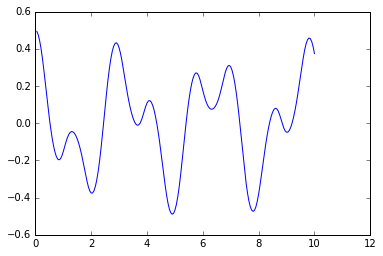

In [214]:
plot(Xs, array(Ys)[:, 0])

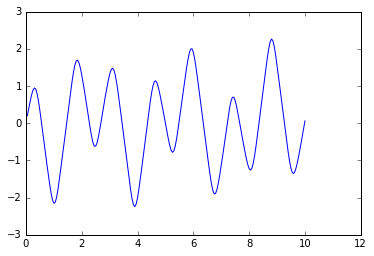

In [215]:
plot(Xs, array(Ys)[:, 3])

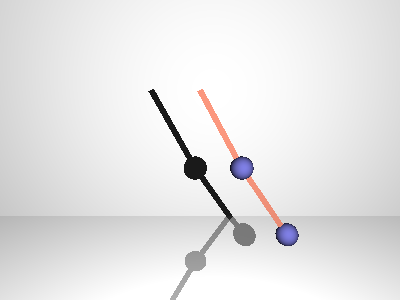

In [210]:
color = lambda col: Texture( Pigment( 'color', col))
def line(fro, to, width=0.1):
    xf, yf = fro
    xt, yt = to
    xd = xt - xf
    yd = yt - yf
    length = np.sqrt(xd**2 + yd**2)
    th = np.rad2deg(np.arctan(xd/yd))
    return Union(
                Box([-width/2, 0, 0], [width/2, length, 0],
                    color([1,.6,.5])),
                'rotate', [0., 0., th],
                'translate', [xf, yf])
def scene(th1, th2):  
    wall = Plane([0, 0, 1], 20, Texture(Pigment('color', [1, 1, 1])))
    ground = Plane( [0, -20, 0], 10,
                Texture( Pigment( 'color', [1, 1, 1]),
                         Finish( 'phong', 0.1,
                                 'reflection',0.4,
                                 'metallic', 0.3)))

    radius = .2
    length = l
    sphere = Sphere([0,0,0],
                    radius,
                    color([.5, .5, .9]),
                    'translate', [0., length, 0.])
    spring = line((0,0), (0, length))
    pendulum = Union(spring,
                     sphere,
                    Union(spring,
                         sphere,
                         'rotate', [0, 0, np.rad2deg(th2)],
                         'translate', [0., length, 0.]),
                    'rotate', [0, 0, 180 + np.rad2deg(th1)],
                    'translate', [0, 1, 0])
    return Scene( Camera( 'location', [0, 1, -5], 'look_at',  [0, 0, 0] ),
            [ LightSource( [1, 1, -5], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              pendulum,
              wall,
              ground])
scene(0.5, 0.1).render('ipython', width=400, height=300)

In [207]:
def anim(Ys, d=10, fps=30):
    ths = array(Ys)[:, 0]
    ls = array(Ys)[:, 3]
    ln = len(ls)
    scale = lambda t: int(t/d*ln)
    make_frame = lambda t: scene(ths[scale(t)], ls[scale(t)]).render(width = 400, height = 300, antialiasing=0.1)
    name = "anim_%d.gif" % time.time() 
    VideoClip(make_frame, duration=d).write_gif(name, fps=fps)
    return Image(url = name)

In [212]:
anim(Ys, d=10, fps=30)


[MoviePy] Building file anim_1461758674.gif with imageio
